=== DATASET SHAPE ===
Rows: 95837, Columns: 23

=== FIRST 5 ROWS ===
                 id_songs         name_song  popularity_songs  duration_ms  \
0  0IA0Hju8CAgYfV1hwhidBH           La Java                 0       161427   
1  1b8HZQCqcqwbzlA1jRTp6E          En Douce                 0       223440   
2  5d5gQxHwYovxR5pqETOIAa     J'en Ai Marre                 0       208267   
3  1EO65UEEPfy7CR0NK2sDxy  Ils n'ont pas ca                 0       161933   
4  6a58gXSgqbIsXUhVZ6ZJqe         La belote                 0       167973   

   explicit              id_artists release_date  danceability  energy  key  \
0         0  4AxgXfD7ISvJSTObqm4aIE         1922         0.563   0.184    4   
1         0  4AxgXfD7ISvJSTObqm4aIE         1922         0.427   0.180   10   
2         0  4AxgXfD7ISvJSTObqm4aIE         1922         0.511   0.206    0   
3         0  4AxgXfD7ISvJSTObqm4aIE         1924         0.676   0.467    9   
4         0  4AxgXfD7ISvJSTObqm4aIE         1924         0.650   0.

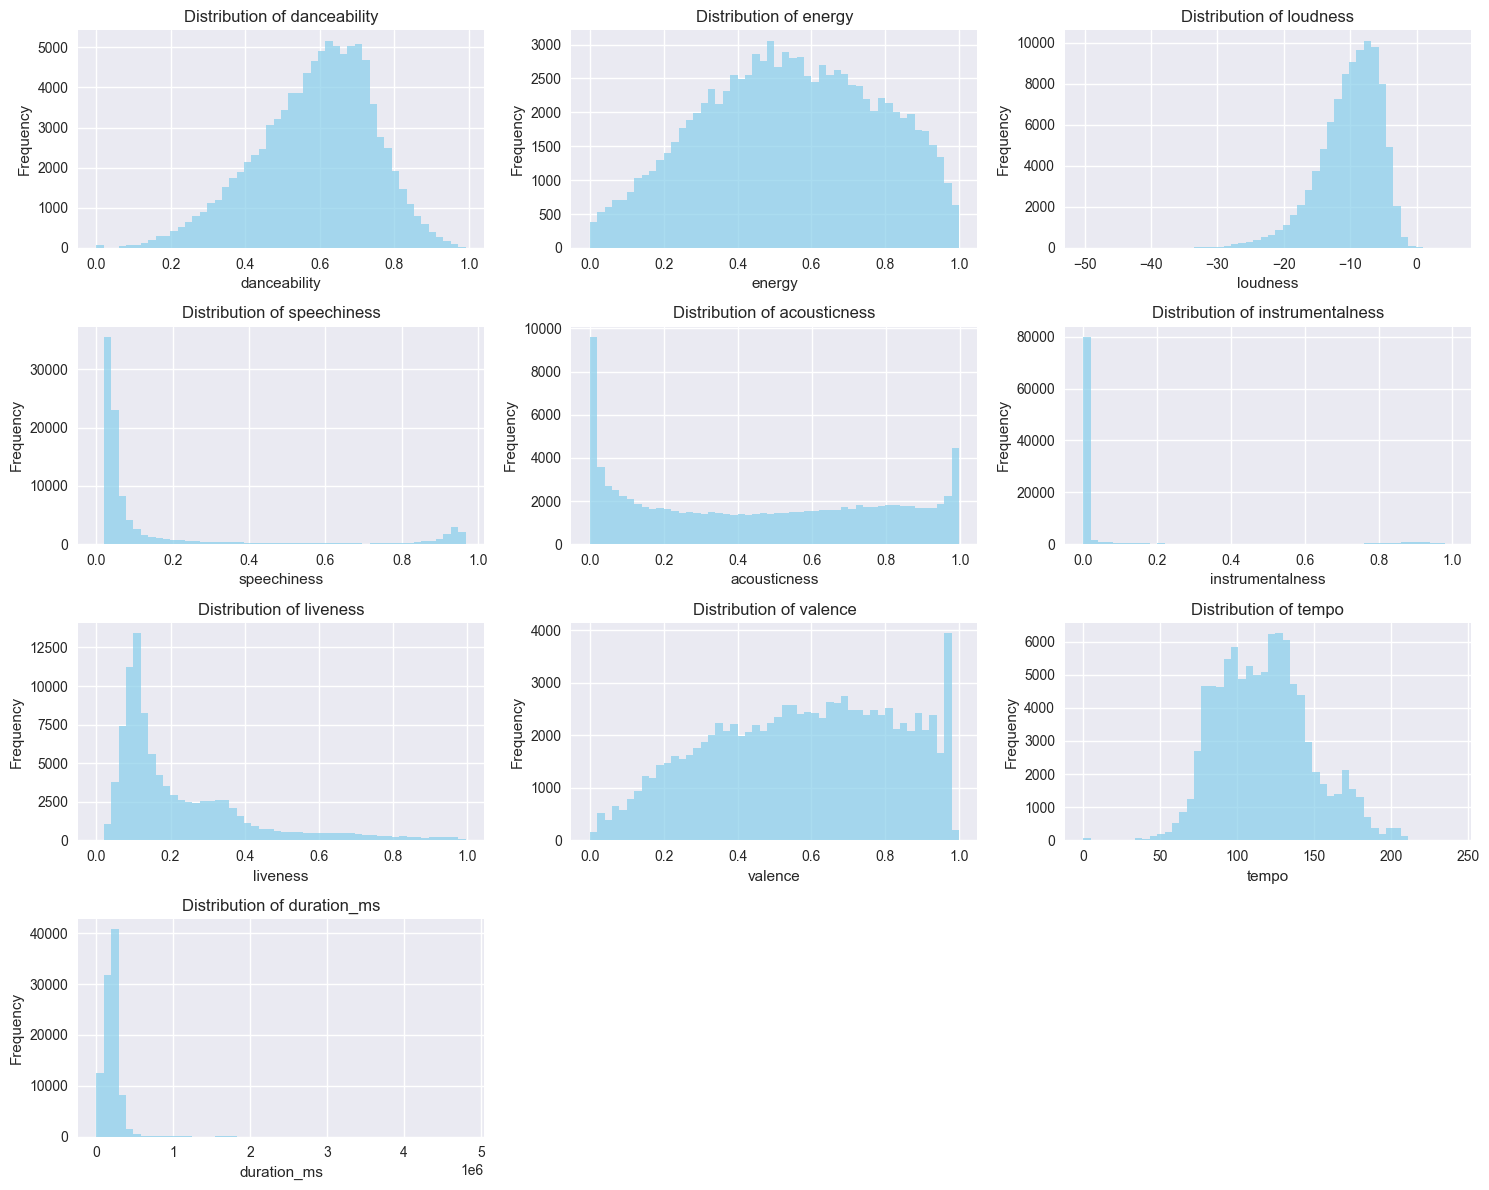

=== FEATURE RANGES ===
      danceability    energy   loudness  speechiness  acousticness  \
min       0.000000  0.000020 -50.174000     0.000000      0.000000   
max       0.991000  1.000000   5.376000     0.968000      0.996000   
mean      0.586853  0.541083 -10.157862     0.168832      0.458989   
std       0.155422  0.236304   4.748798     0.275417      0.330416   

      instrumentalness  liveness   valence       tempo   duration_ms  
min           0.000000  0.000000  0.000000    0.000000  6.373000e+03  
max           1.000000  0.997000  1.000000  239.906000  4.800118e+06  
mean          0.082145  0.224916  0.574281  117.539870  2.087320e+05  
std           0.232440  0.185829  0.248126   30.190399  1.177526e+05  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Load your dataset
df = pd.read_csv('C:\project_4\single_genre_artists.csv')

# Check basic information
print("=== DATASET SHAPE ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== COLUMN NAMES & DATA TYPES ===")
print(df.info())

print("\n=== BASIC STATISTICS ===")
print(df.describe())

# Check for data quality issues
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n=== DUPLICATE ROWS ===")
print(f"Duplicate rows: {df.duplicated().sum()}")

# List all columns
print("=== ALL COLUMNS IN DATASET ===")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

# Drop unnecessary columns
columns_to_drop = ['id_songs', 'name_song', 'id_artists', 'name_artists', 'genres', 'release_date']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Original shape: {df.shape}")
print(f"After dropping columns: {df_clean.shape}")
print(f"Remaining columns: {list(df_clean.columns)}")

# Visualize distributions of audio features
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 
                  'tempo', 'duration_ms']

# Create subplots for histograms
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(audio_features):
    if feature in df_clean.columns:
        df_clean[feature].hist(bins=50, ax=axes[i], alpha=0.7, color='skyblue')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(len(audio_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Check feature ranges
print("=== FEATURE RANGES ===")
feature_stats = df_clean[audio_features].describe()
print(feature_stats.loc[['min', 'max', 'mean', 'std']])

In [3]:
# STEP 2: FEATURE SELECTION & DATA NORMALIZATION

# Finalize feature selection
selected_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

print("=== SELECTED FEATURES FOR CLUSTERING ===")
print(selected_features)
print(f"Total features: {len(selected_features)}")

# Create feature matrix
X = df_clean[selected_features]
print(f"\nFeature matrix shape: {X.shape}")

# Data Normalization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

print("=== BEFORE SCALING (first 5 rows) ===")
print(X.head())
print("\n=== AFTER SCALING (first 5 rows) ===")
print(X_scaled_df.head())

# Verify scaling worked
print("=== VERIFYING SCALING ===")
print(f"Means after scaling: {X_scaled_df.mean().values}")
print(f"Standard deviations after scaling: {X_scaled_df.std().values}")

=== SELECTED FEATURES FOR CLUSTERING ===
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Total features: 10

Feature matrix shape: (95837, 10)
=== BEFORE SCALING (first 5 rows) ===
   danceability  energy  loudness  speechiness  acousticness  \
0         0.563   0.184   -13.757       0.0512         0.993   
1         0.427   0.180   -15.375       0.0670         0.989   
2         0.511   0.206   -15.514       0.0592         0.995   
3         0.676   0.467   -12.393       0.1650         0.991   
4         0.650   0.298   -13.806       0.1380         0.991   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000016     0.325    0.654  133.088       161427  
1          0.000000     0.128    0.431   78.459       223440  
2          0.000000     0.418    0.481   70.443       208267  
3          0.000000     0.219    0.726  129.775       161933  
4          0.000000     0.373 

=== PCA RESULTS ===
Original shape: (95837, 10)
PCA shape: (95837, 2)
Explained variance ratio: [0.27079553 0.18821441]
Total variance explained: 0.4590


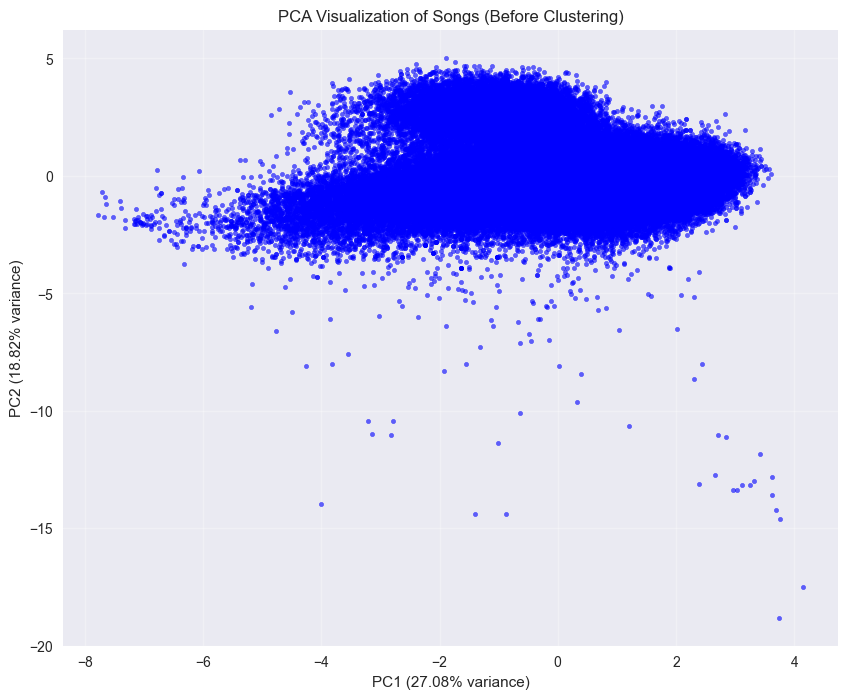

=== FEATURE CONTRIBUTIONS TO PRINCIPAL COMPONENTS ===
                       PC1       PC2
danceability      0.241487  0.412750
energy            0.534961  0.006301
loudness          0.492595 -0.084228
speechiness      -0.137554  0.558823
acousticness     -0.455230  0.068161
instrumentalness -0.184806 -0.246232
liveness         -0.043345  0.359915
valence           0.319655  0.298529
tempo             0.205986 -0.225192
duration_ms       0.077805 -0.419017


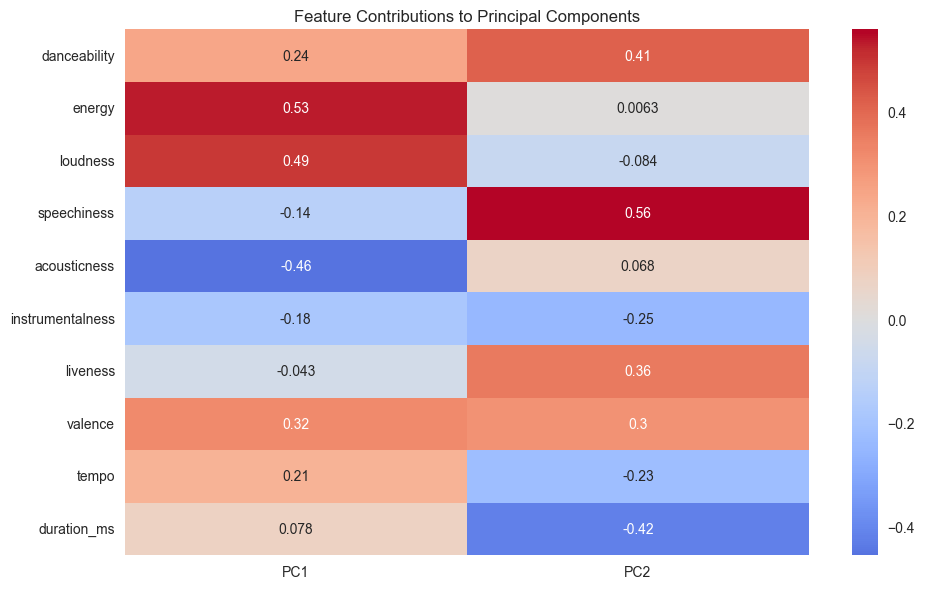

In [4]:
# STEP 3: DIMENSIONALITY REDUCTION

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

print("=== PCA RESULTS ===")
print(f"Original shape: {X_scaled.shape}")
print(f"PCA shape: {X_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")

# Visualize PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, s=10, color='blue')
plt.title('PCA Visualization of Songs (Before Clustering)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, alpha=0.3)
plt.show()

# Check feature contributions to PCA
pca_components_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=selected_features
)

print("=== FEATURE CONTRIBUTIONS TO PRINCIPAL COMPONENTS ===")
print(pca_components_df)

# Visualize feature contributions
plt.figure(figsize=(10, 6))
sns.heatmap(pca_components_df, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()
plt.show()

Starting clustering analysis...
Using sample of 10000 songs for faster computation
Testing k values: [2, 3, 4, 5, 6, 7]
Testing k=2... Silhouette: 0.1977 Time: 2.04s
Testing k=3... Silhouette: 0.2364 Time: 2.07s
Testing k=4... Silhouette: 0.2262 Time: 1.93s
Testing k=5... Silhouette: 0.1865 Time: 1.97s
Testing k=6... Silhouette: 0.1857 Time: 1.94s
Testing k=7... Silhouette: 0.1866 Time: 2.02s

Clustering analysis completed!


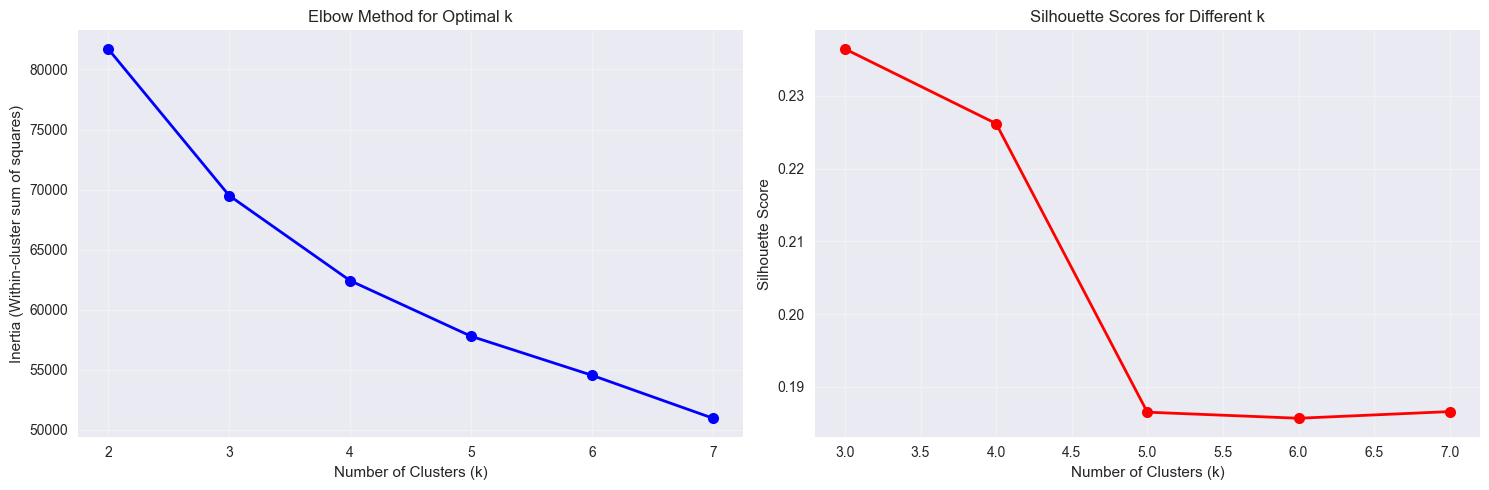

=== CLUSTERING RESULTS ===
k	Inertia		Silhouette Score	Time (s)
--------------------------------------------------
2	81,710		0.19771683624211017		2.04
3	69,507		0.2364420252787831		2.07
4	62,423		0.22617662009155656		1.93
5	57,794		0.18653078837512813		1.97
6	54,544		0.1856957878625416		1.94
7	50,969		0.18661218332565951		2.02

*** RECOMMENDED NUMBER OF CLUSTERS: k=3 ***
Best Silhouette Score: 0.2364

Applying K-Means with k=3 to full dataset...
Clustering completed! Cluster distribution:
cluster
0    12513
1    30807
2    52517
Name: count, dtype: int64


In [7]:
# STEP 4: CLUSTERING TECHNIQUES (OPTIMIZED)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

print("Starting clustering analysis...")

# OPTION 1: Use a sample for faster testing (recommended)
sample_size = 10000  # Use 10,000 songs for testing
if len(X_scaled) > sample_size:
    # Take a random sample
    np.random.seed(42)
    random_indices = np.random.choice(len(X_scaled), size=sample_size, replace=False)
    X_sample = X_scaled[random_indices]
    print(f"Using sample of {sample_size} songs for faster computation")
else:
    X_sample = X_scaled
    print("Using full dataset")

# OPTION 2: Test fewer k values for faster results
k_range = range(2, 8)  # Reduced from 2-15 to 2-8
inertias = []
silhouette_scores = []
times = []

print(f"Testing k values: {list(k_range)}")

for k in k_range:
    start_time = time.time()
    
    print(f"Testing k={k}...", end=" ")
    
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score (only for k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(X_sample, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette: {silhouette_avg:.4f}", end=" ")
    else:
        silhouette_scores.append(0)
    
    end_time = time.time()
    elapsed = end_time - start_time
    times.append(elapsed)
    print(f"Time: {elapsed:.2f}s")

print("\nClustering analysis completed!")

# Plot Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Elbow Method
ax1.plot(k_range, inertias, 'bo-', markersize=8, linewidth=2)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Plot Silhouette Scores
ax2.plot(k_range[1:], silhouette_scores[1:], 'ro-', markersize=8, linewidth=2)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores for Different k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== CLUSTERING RESULTS ===")
print("k\tInertia\t\tSilhouette Score\tTime (s)")
print("-" * 50)
for i, k in enumerate(k_range):
    silhouette = silhouette_scores[i] if k > 1 else "N/A"
    print(f"{k}\t{inertias[i]:,.0f}\t\t{silhouette}\t\t{times[i]:.2f}")

# Find best k based on silhouette score
if len(silhouette_scores) > 1:
    best_k_index = np.argmax(silhouette_scores[1:]) + 1
    best_k = k_range[best_k_index]
    best_silhouette = silhouette_scores[best_k_index]
    print(f"\n*** RECOMMENDED NUMBER OF CLUSTERS: k={best_k} ***")
    print(f"Best Silhouette Score: {best_silhouette:.4f}")

    # Apply K-Means with the optimal k (you can adjust this based on the results)
optimal_k = best_k  # or choose based on elbow method

print(f"\nApplying K-Means with k={optimal_k} to full dataset...")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

# Add cluster labels to original dataframe
df_clean['cluster'] = final_kmeans.labels_
df['cluster'] = final_kmeans.labels_  # Add to original df for reference

print(f"Clustering completed! Cluster distribution:")
print(df_clean['cluster'].value_counts().sort_index())

=== CLUSTER DISTRIBUTION ===
cluster
0    12513
1    30807
2    52517
Name: count, dtype: int64


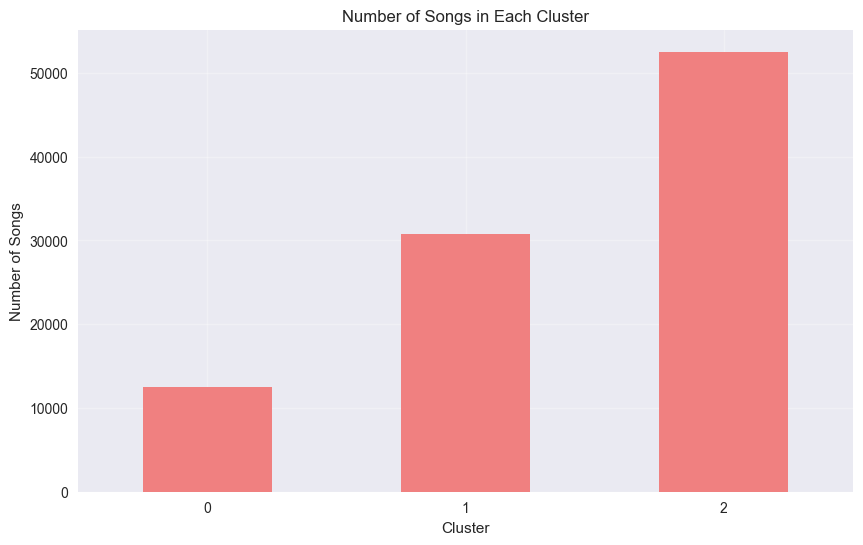


Total clusters: 3
Smallest cluster: 12513 songs (13.1%)
Largest cluster: 52517 songs (54.8%)
=== CLUSTER PROFILES (MEAN VALUES) ===
         danceability  energy  loudness  speechiness  acousticness  \
cluster                                                              
0               0.664   0.467   -13.364        0.830         0.586   
1               0.486   0.311   -13.205        0.060         0.749   
2               0.627   0.694    -7.606        0.075         0.258   

         instrumentalness  liveness  valence    tempo  duration_ms  
cluster                                                             
0                   0.001     0.436    0.584  100.389    97520.590  
1                   0.169     0.182    0.413  111.940   223457.064  
2                   0.051     0.200    0.666  124.911   226592.053  


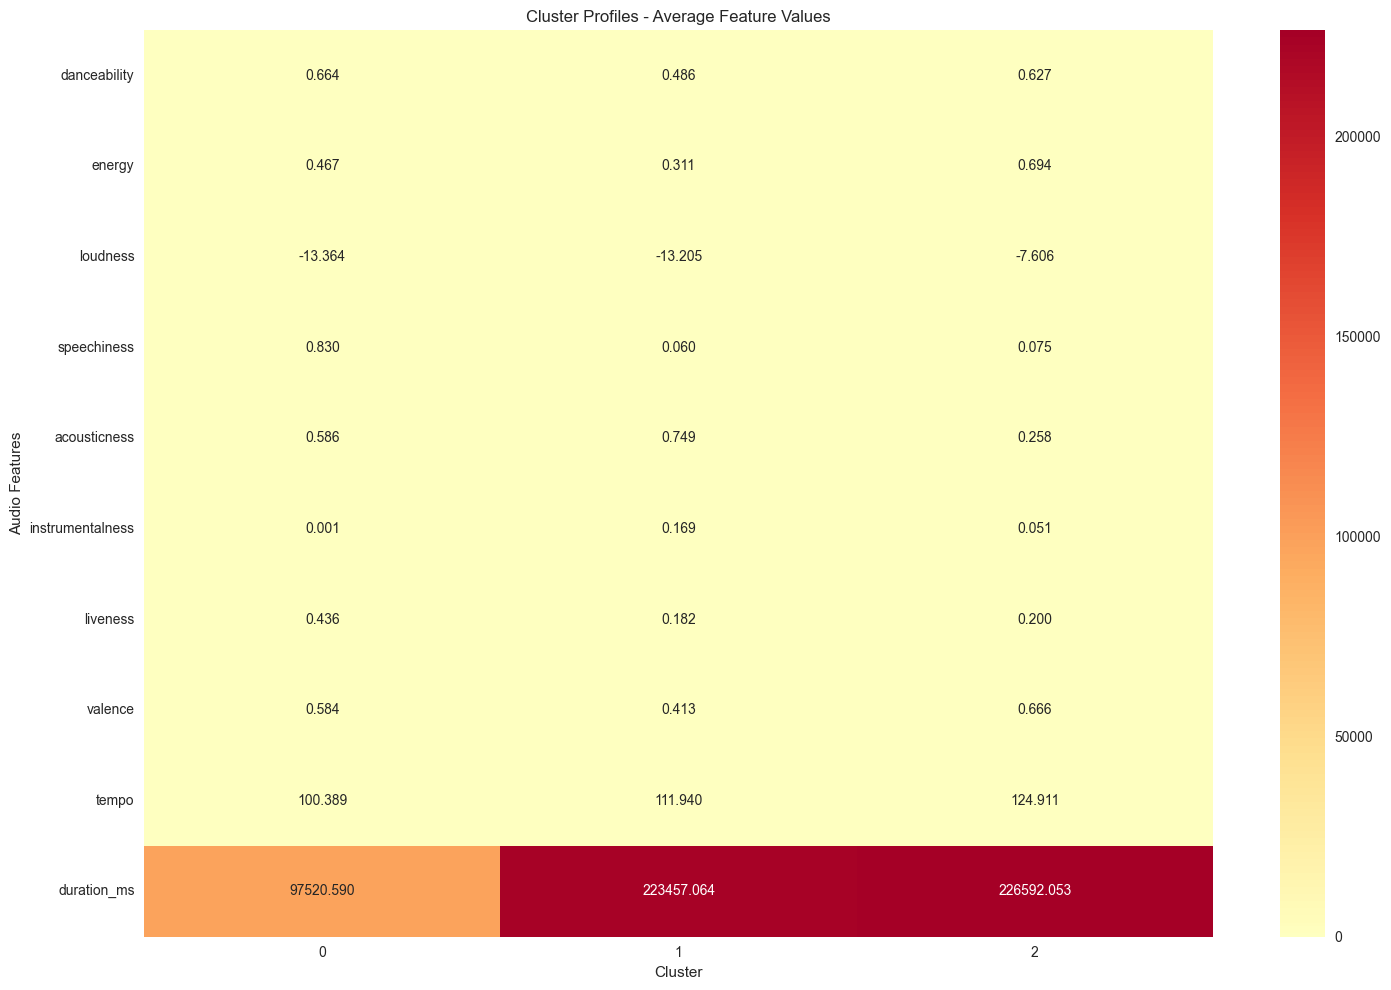

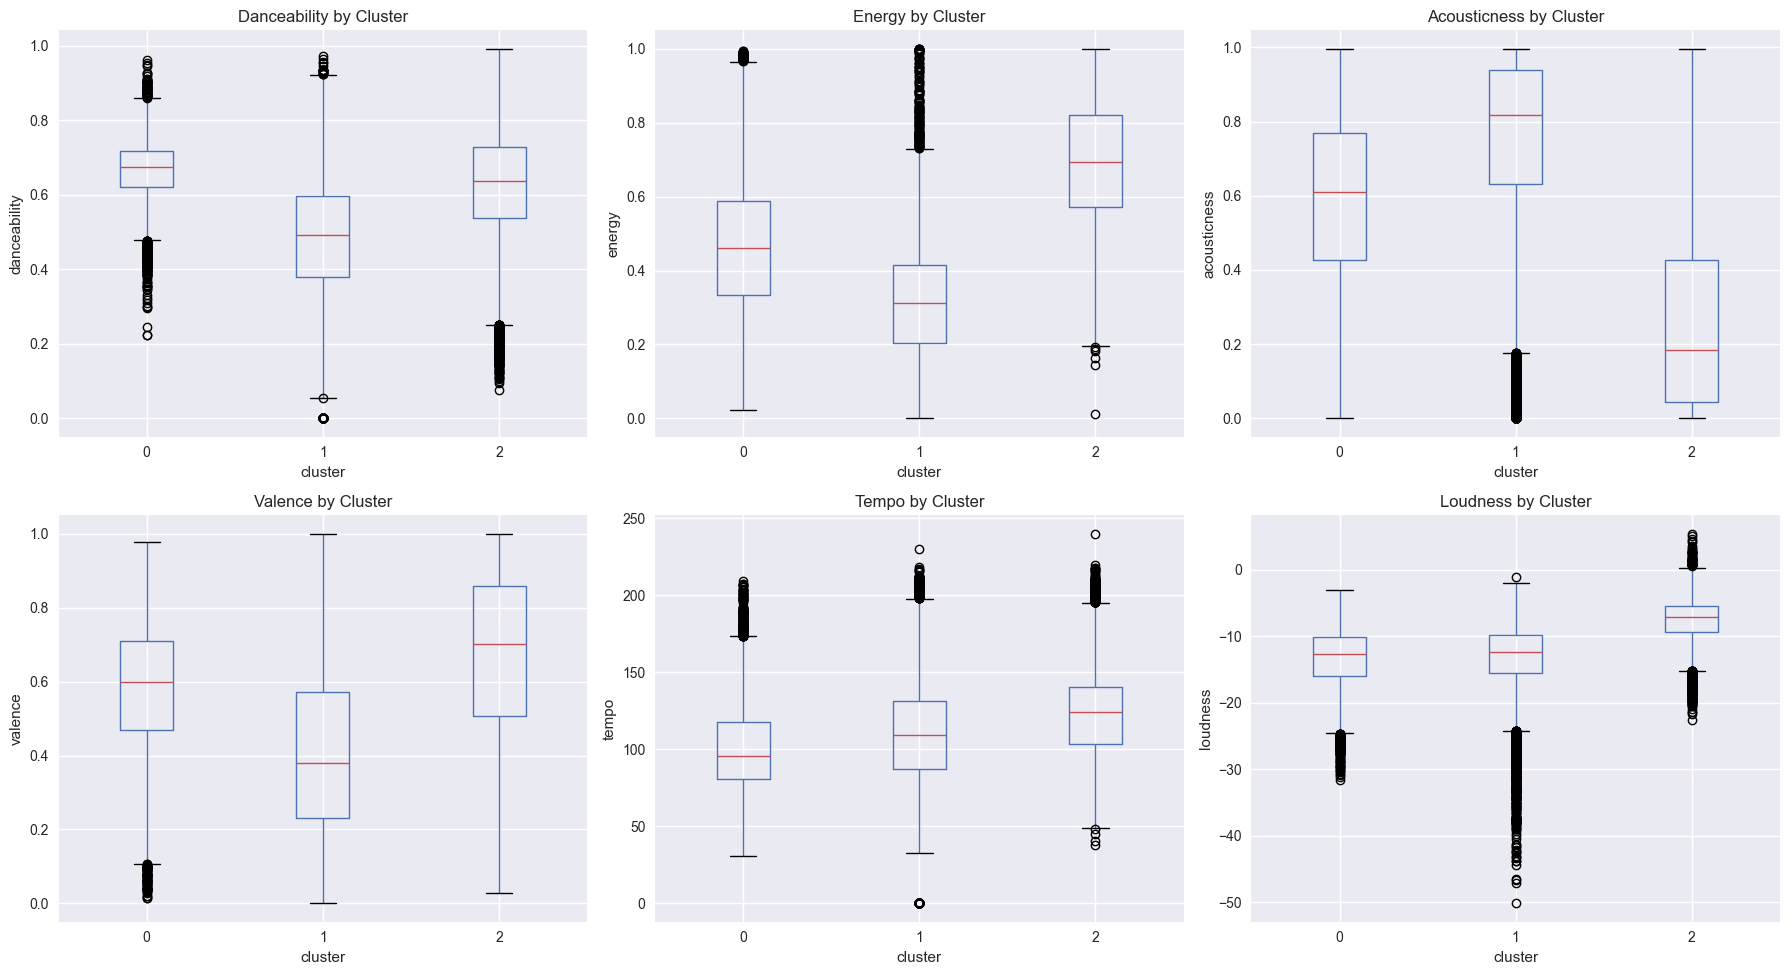

=== CLUSTER INTERPRETATIONS ===
Cluster	Size	Interpretation
------------------------------------------------------------
0	12513	Speech-heavy
1	30807	Acoustic
2	52517	High Energy & Danceable | Positive/Happy
=== FINAL CLUSTERING EVALUATION ===
Silhouette Score: 0.2423
Davies-Bouldin Index: 1.5702
Inertia: 658,335.08
Silhouette Interpretation: No substantial structure


In [10]:
# Analyze cluster distribution
print("=== CLUSTER DISTRIBUTION ===")
cluster_counts = df_clean['cluster'].value_counts().sort_index()
print(cluster_counts)

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Songs in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nTotal clusters: {len(cluster_counts)}")
print(f"Smallest cluster: {cluster_counts.min()} songs ({cluster_counts.min()/len(df_clean)*100:.1f}%)")
print(f"Largest cluster: {cluster_counts.max()} songs ({cluster_counts.max()/len(df_clean)*100:.1f}%)")

# Calculate mean values for each feature per cluster
cluster_profiles = df_clean.groupby('cluster')[selected_features].mean()

print("=== CLUSTER PROFILES (MEAN VALUES) ===")
print(cluster_profiles.round(3))

# Visualize cluster profiles
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_profiles.T, annot=True, cmap='RdYlBu_r', center=0, fmt='.3f')
plt.title('Cluster Profiles - Average Feature Values')
plt.ylabel('Audio Features')
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

# Compare key features across clusters
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

key_features = ['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness']

for i, feature in enumerate(key_features):
    df_clean.boxplot(column=feature, by='cluster', ax=axes[i])
    axes[i].set_title(f'{feature.title()} by Cluster')
    axes[i].set_ylabel(feature)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

# Function to interpret clusters based on their characteristics
def interpret_cluster(cluster_data, cluster_num):
    features = cluster_data.loc[cluster_num]
    
    interpretation = []
    
    # Danceability and Energy (Party vs Chill)
    if features['danceability'] > 0.6 and features['energy'] > 0.6:
        interpretation.append("High Energy & Danceable")
    elif features['danceability'] < 0.4 and features['energy'] < 0.4:
        interpretation.append("Low Energy & Calm")
    
    # Acousticness
    if features['acousticness'] > 0.6:
        interpretation.append("Acoustic")
    elif features['acousticness'] < 0.2:
        interpretation.append("Electronic")
    
    # Instrumentalness
    if features['instrumentalness'] > 0.5:
        interpretation.append("Instrumental")
    
    # Valence (Positivity)
    if features['valence'] > 0.6:
        interpretation.append("Positive/Happy")
    elif features['valence'] < 0.4:
        interpretation.append("Sad/Melancholic")
    
    # Speechiness
    if features['speechiness'] > 0.3:
        interpretation.append("Speech-heavy")
    
    return " | ".join(interpretation) if interpretation else "Mixed Characteristics"

print("=== CLUSTER INTERPRETATIONS ===")
print("Cluster\tSize\tInterpretation")
print("-" * 60)

for cluster_num in sorted(df_clean['cluster'].unique()):
    cluster_data = cluster_profiles.loc[cluster_num]
    size = cluster_counts.loc[cluster_num]
    interpretation = interpret_cluster(cluster_profiles, cluster_num)
    print(f"{cluster_num}\t{size}\t{interpretation}")

    from sklearn.metrics import davies_bouldin_score

# Calculate final evaluation metrics
final_silhouette = silhouette_score(X_scaled, final_kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_scaled, final_kmeans.labels_)

print("=== FINAL CLUSTERING EVALUATION ===")
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Inertia: {final_kmeans.inertia_:,.2f}")

# Interpret silhouette score
if final_silhouette > 0.7:
    silhouette_interpretation = "Strong clustering structure"
elif final_silhouette > 0.5:
    silhouette_interpretation = "Reasonable clustering structure"
elif final_silhouette > 0.25:
    silhouette_interpretation = "Weak clustering structure"
else:
    silhouette_interpretation = "No substantial structure"

print(f"Silhouette Interpretation: {silhouette_interpretation}")

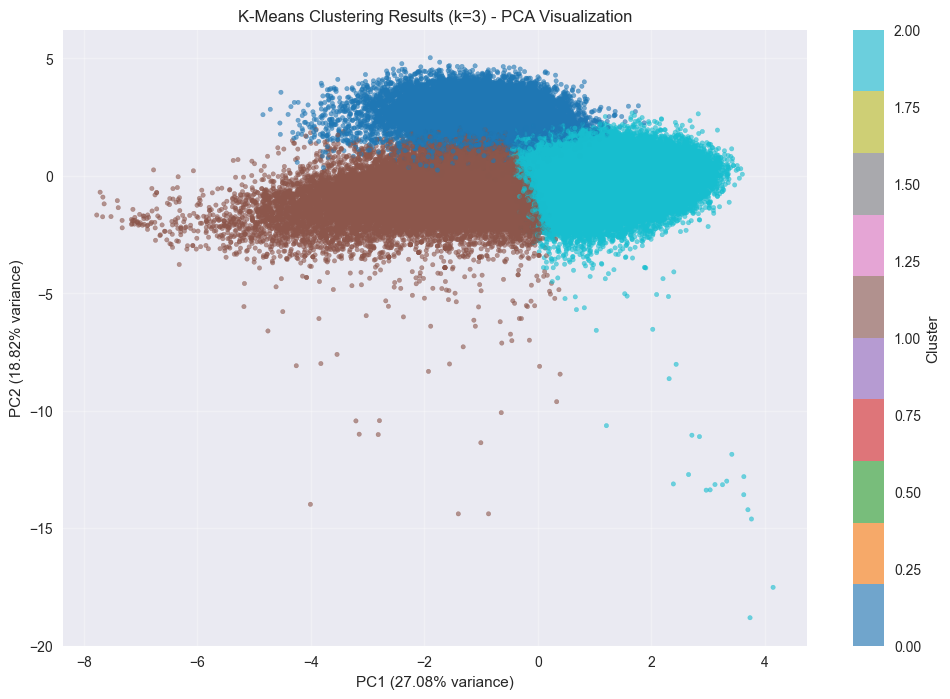

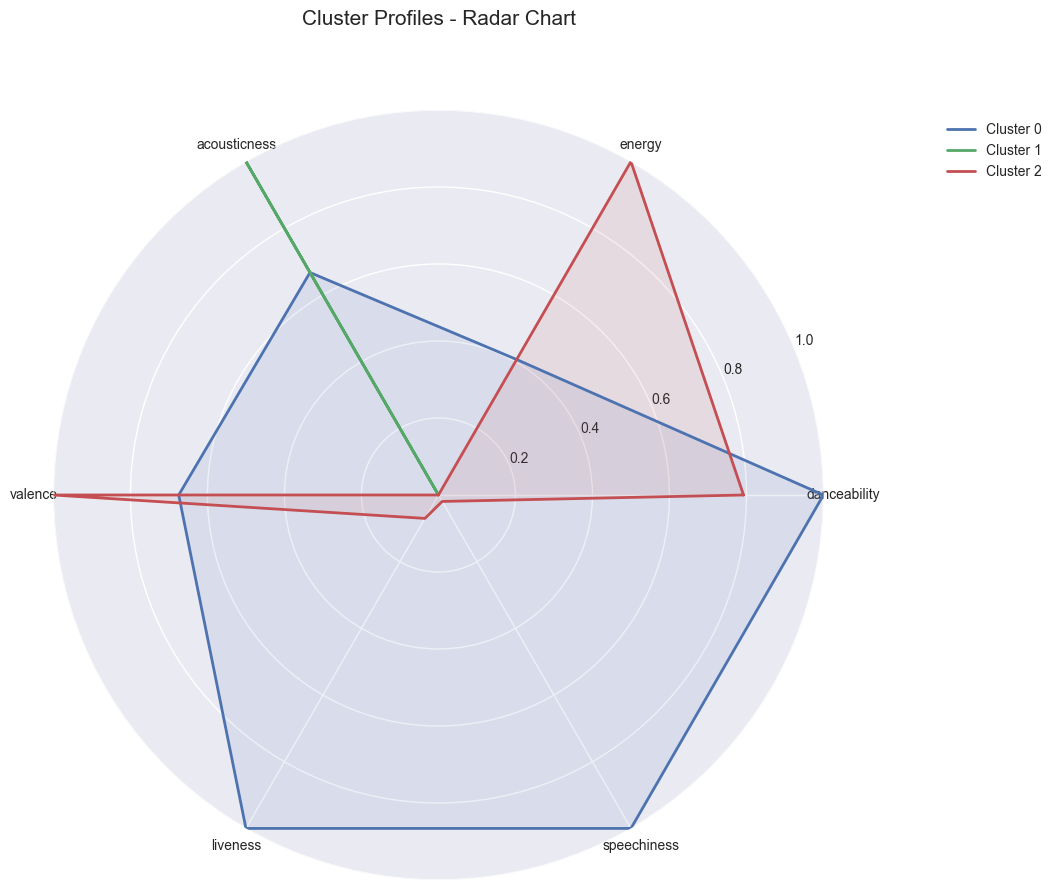

=== DOMINANT FEATURES PER CLUSTER ===

Cluster 0:
  - speechiness: +391.6% (HIGHER than average)
  - instrumentalness: -98.3% (LOWER than average)
  - liveness: +93.6% (HIGHER than average)

Cluster 1:
  - instrumentalness: +105.2% (HIGHER than average)
  - speechiness: -64.4% (LOWER than average)
  - acousticness: +63.2% (HIGHER than average)

Cluster 2:
  - speechiness: -55.5% (LOWER than average)
  - acousticness: -43.7% (LOWER than average)
  - instrumentalness: -38.3% (LOWER than average)
=== SAMPLE SONGS FROM EACH CLUSTER ===

🎵 Cluster 0 (Size: 12513 songs):
   Song: 'Dites Moi Doumergue'
   Artist: Perchicot
   Genre: ['vintage chanson']
   Characteristics: High in duration_ms, tempo

🎵 Cluster 1 (Size: 30807 songs):
   Song: 'La Java'
   Artist: Mistinguett
   Genre: ['vintage chanson']
   Characteristics: High in duration_ms, tempo

🎵 Cluster 2 (Size: 52517 songs):
   Song: 'On M'suit'
   Artist: Mistinguett
   Genre: ['vintage chanson']
   Characteristics: High in duration_m

In [11]:
# Create PCA visualization with cluster colors
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=df_clean['cluster'], 
                     cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label='Cluster')
plt.title(f'K-Means Clustering Results (k={optimal_k}) - PCA Visualization')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True, alpha=0.3)
plt.show()

# Create radar chart for cluster profiles
from math import pi

# Normalize features for radar chart (0-1 scale)
def create_radar_chart(cluster_profiles, features):
    # Select key features for radar chart
    radar_features = ['danceability', 'energy', 'acousticness', 'valence', 'liveness', 'speechiness']
    
    # Normalize data for radar chart
    normalized_profiles = (cluster_profiles[radar_features] - cluster_profiles[radar_features].min()) / \
                         (cluster_profiles[radar_features].max() - cluster_profiles[radar_features].min())
    
    # Set up radar chart
    categories = radar_features
    N = len(categories)
    
    # Compute angles for radar chart
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the circle
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Plot each cluster
    for cluster_num in normalized_profiles.index:
        values = normalized_profiles.loc[cluster_num].values.tolist()
        values += values[:1]  # Complete the circle
        ax.plot(angles, values, linewidth=2, label=f'Cluster {cluster_num}')
        ax.fill(angles, values, alpha=0.1)
    
    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    plt.title('Cluster Profiles - Radar Chart', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.show()

create_radar_chart(cluster_profiles, selected_features)

# Identify dominant features for each cluster
print("=== DOMINANT FEATURES PER CLUSTER ===")

for cluster_num in sorted(cluster_profiles.index):
    cluster_data = cluster_profiles.loc[cluster_num]
    
    # Find features that are significantly above average
    global_means = df_clean[selected_features].mean()
    deviations = (cluster_data - global_means) / global_means
    
    # Get top 3 features that are most different from global average
    top_features = deviations.abs().nlargest(3).index.tolist()
    
    print(f"\nCluster {cluster_num}:")
    for feature in top_features:
        deviation_pct = deviations[feature] * 100
        if deviation_pct > 0:
            direction = "HIGHER"
        else:
            direction = "LOWER"
        print(f"  - {feature}: {deviation_pct:+.1f}% ({direction} than average)")

        # Show sample songs from each cluster
print("=== SAMPLE SONGS FROM EACH CLUSTER ===")

for cluster_num in sorted(df['cluster'].unique()):
    cluster_songs = df[df['cluster'] == cluster_num]
    sample_song = cluster_songs.iloc[0]  # Get first song from cluster
    
    print(f"\n🎵 Cluster {cluster_num} (Size: {len(cluster_songs)} songs):")
    print(f"   Song: '{sample_song['name_song']}'")
    print(f"   Artist: {sample_song['name_artists']}")
    print(f"   Genre: {sample_song['genres']}")
    
    # Show key characteristics
    cluster_profile = cluster_profiles.loc[cluster_num]
    high_features = cluster_profile.nlargest(2).index.tolist()
    print(f"   Characteristics: High in {', '.join(high_features)}")

    # Create comprehensive cluster summary
print("=" * 80)
print("FINAL CLUSTER ANALYSIS SUMMARY")
print("=" * 80)

for cluster_num in sorted(cluster_profiles.index):
    size = cluster_counts.loc[cluster_num]
    percentage = (size / len(df_clean)) * 100
    
    profile = cluster_profiles.loc[cluster_num]
    interpretation = interpret_cluster(cluster_profiles, cluster_num)
    
    print(f"\n📊 CLUSTER {cluster_num}:")
    print(f"   Size: {size} songs ({percentage:.1f}% of dataset)")
    print(f"   Interpretation: {interpretation}")
    print(f"   Key Features:")
    
    # Show top 3 highest features
    top_features = profile.nlargest(3)
    for feature, value in top_features.items():
        print(f"     - {feature}: {value:.3f}")
    
    # Show potential genre/mood
    if 'Acoustic' in interpretation and 'Low Energy' in interpretation:
        print(f"   🎵 Potential: Acoustic/Folk, Chill, Background music")
    elif 'High Energy' in interpretation and 'Danceable' in interpretation:
        print(f"   🎵 Potential: Dance, Party, Workout music")
    elif 'Electronic' in interpretation:
        print(f"   🎵 Potential: Electronic, EDM, Synth-pop")
    elif 'Instrumental' in interpretation:
        print(f"   🎵 Potential: Classical, Instrumental, Focus music")
    elif 'Positive/Happy' in interpretation:
        print(f"   🎵 Potential: Pop, Happy, Uplifting music")
    elif 'Sad/Melancholic' in interpretation:
        print(f"   🎵 Potential: Sad, Emotional, Ballads")

        
        


=== EXPORTING FINAL DATASET ===
✅ Final dataset exported as: amazon_music_with_clusters.csv
✅ Total songs: 95837
✅ Total clusters: 3
✅ File includes cluster labels and interpretations
=== CLUSTER SUMMARY STATISTICS ===
         song_count  danceability  energy  acousticness  valence    tempo  \
cluster                                                                     
0             12513         0.664   0.467         0.586    0.584  100.389   
1             30807         0.486   0.311         0.749    0.413  111.940   
2             52517         0.627   0.694         0.258    0.666  124.911   

         popularity_songs                  genres  percentage  \
cluster                                                         
0                  28.167           ['hoerspiel']        13.1   
1                  20.708  ['vintage taiwan pop']        32.1   
2                  28.709                      []        54.8   

                                            interpretation  
cluster 

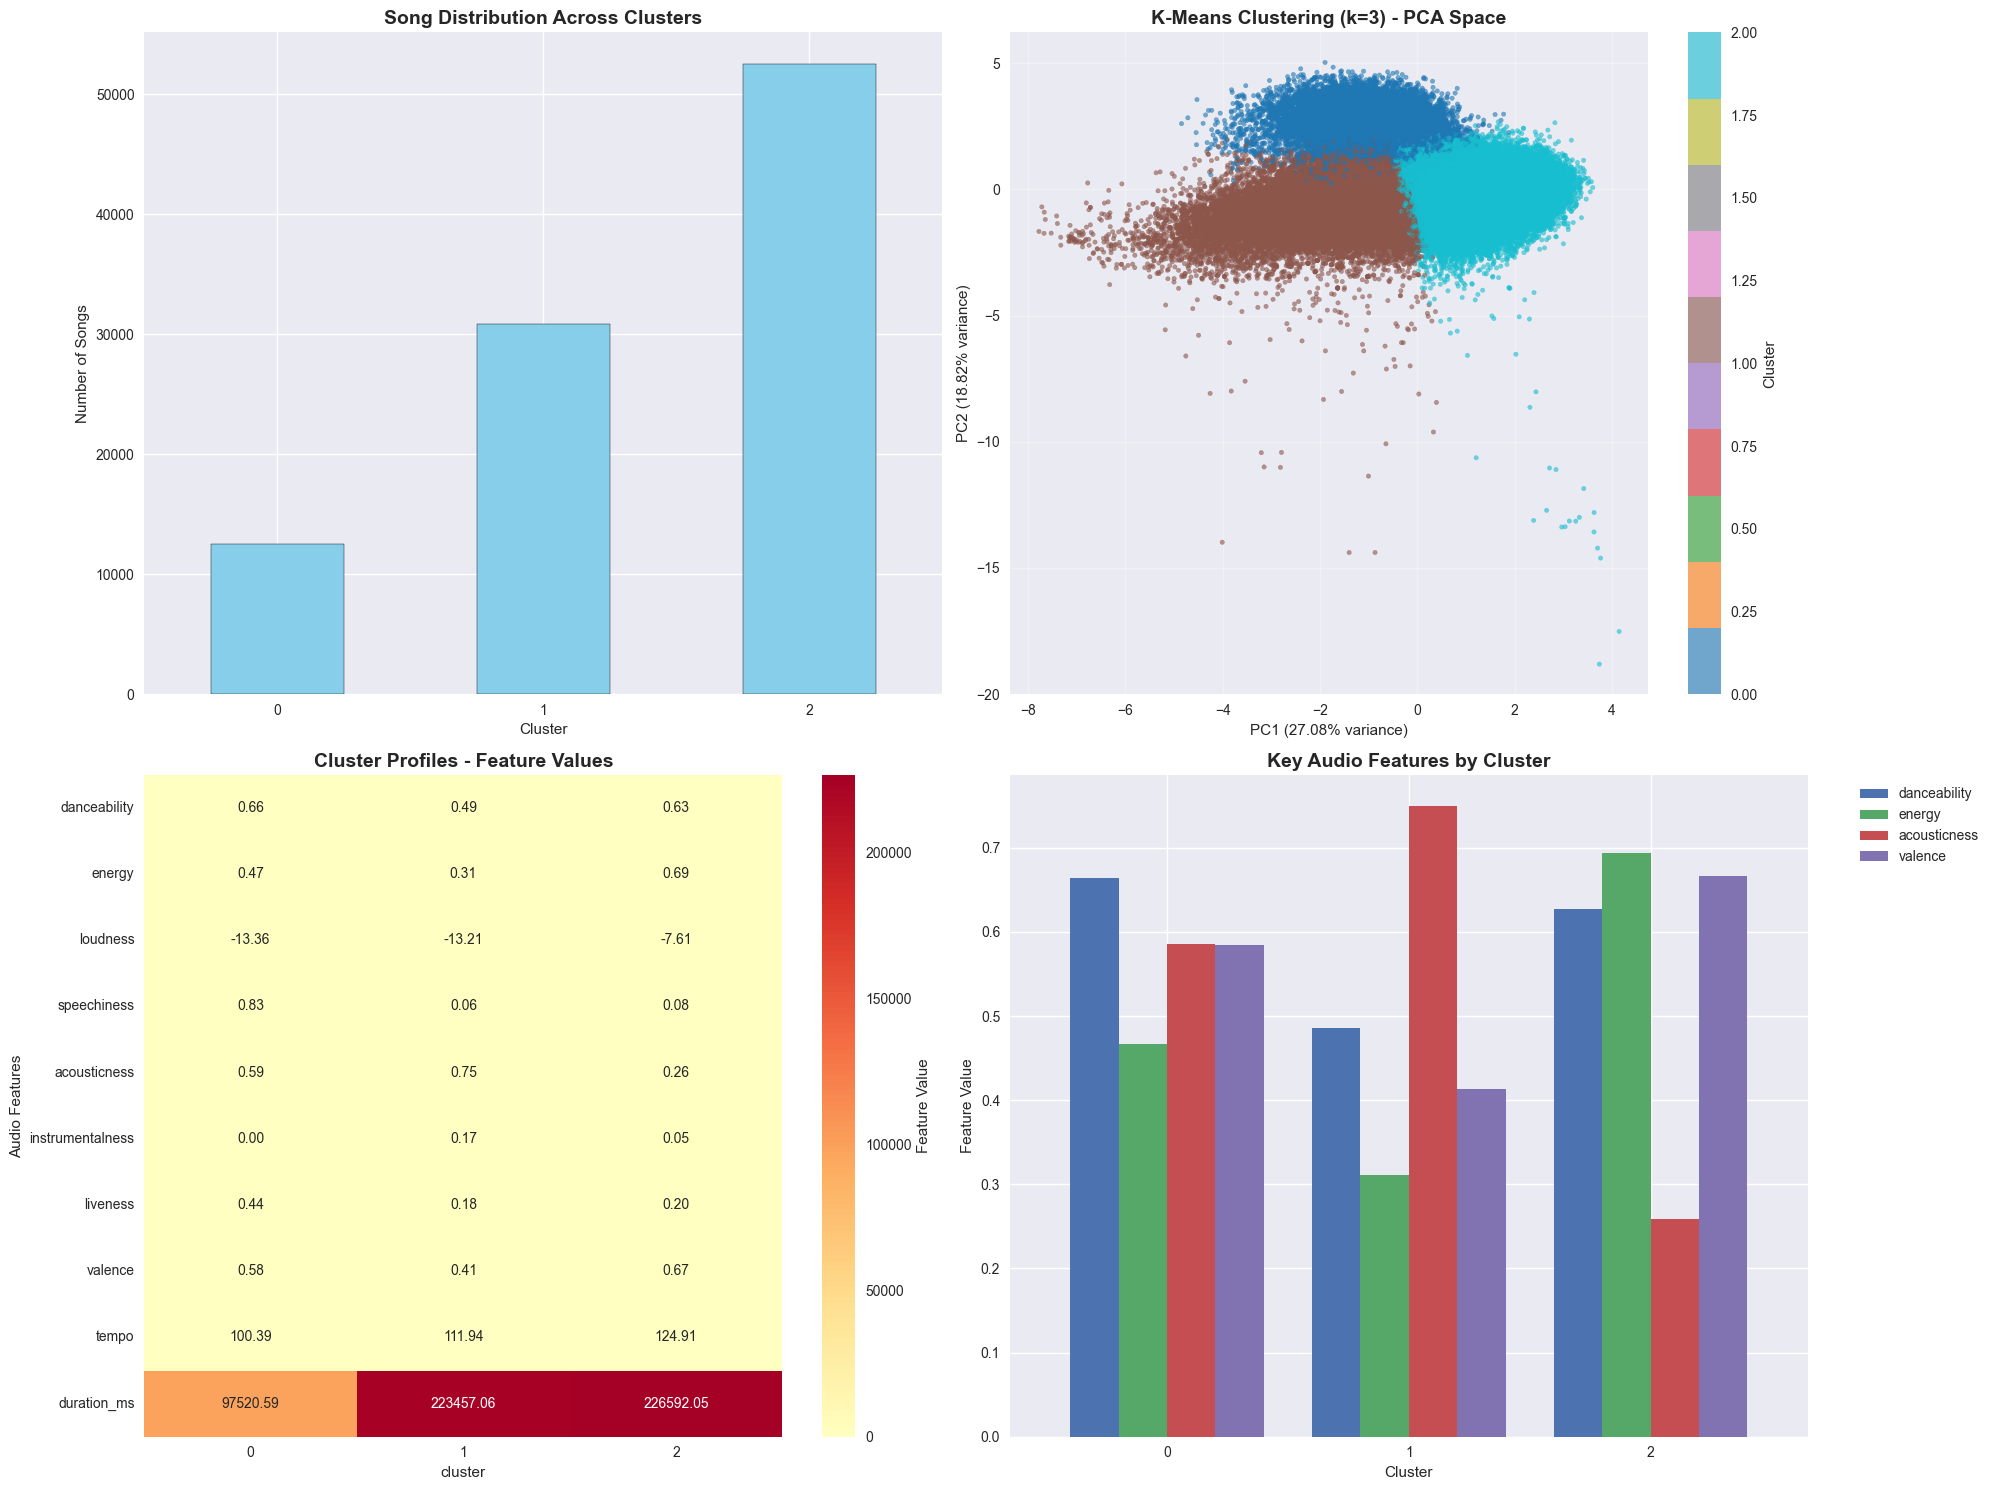

✅ Final visualization saved as: final_clustering_analysis.png
🎉 PROJECT COMPLETION STATUS 🎉
✓ Step 1: Data Exploration & Preprocessing - COMPLETED
✓ Step 2: Feature Selection & Normalization - COMPLETED
✓ Step 3: Dimensionality Reduction (PCA) - COMPLETED
✓ Step 4: Clustering with K-Means - COMPLETED
✓ Step 5: Cluster Evaluation & Interpretation - COMPLETED
✓ Step 6: Visualization & Analysis - COMPLETED
✓ Step 7: Final Export & Report - COMPLETED

🎵 YOUR AMAZON MUSIC CLUSTERING PROJECT IS NOW COMPLETE! 🎵

📁 Files created:
   1. amazon_music_with_clusters.csv - Main dataset with cluster labels
   2. cluster_summary_statistics.csv - Detailed cluster analysis
   3. final_clustering_analysis.png - Comprehensive visualization
   4. Your Jupyter Notebook - Complete source code

🚀 Next steps:
   • Use the clusters for music recommendation
   • Create playlist generators based on cluster characteristics
   • Analyze how different artists span across clusters
   • Explore temporal trends in mus

In [12]:
# Add cluster interpretations to the dataframe
def get_cluster_interpretation(cluster_num):
    profile = cluster_profiles.loc[cluster_num]
    interpretation = interpret_cluster(cluster_profiles, cluster_num)
    
    # Add more specific genre suggestions
    if 'Acoustic' in interpretation and 'Low Energy' in interpretation:
        genre_suggestion = "Acoustic/Chill"
    elif 'High Energy' in interpretation and 'Danceable' in interpretation:
        genre_suggestion = "Dance/Party"
    elif 'Electronic' in interpretation:
        genre_suggestion = "Electronic"
    elif 'Instrumental' in interpretation:
        genre_suggestion = "Instrumental"
    elif 'Positive/Happy' in interpretation:
        genre_suggestion = "Pop/Happy"
    elif 'Sad/Melancholic' in interpretation:
        genre_suggestion = "Emotional/Ballads"
    else:
        genre_suggestion = "Mixed/Various"
    
    return f"{interpretation} | Suggested: {genre_suggestion}"

# Add interpretation column
df['cluster_interpretation'] = df['cluster'].apply(get_cluster_interpretation)
df_clean['cluster_interpretation'] = df_clean['cluster'].apply(get_cluster_interpretation)

print("=== EXPORTING FINAL DATASET ===")

# Export the final dataset with cluster labels
output_filename = 'amazon_music_with_clusters.csv'
df.to_csv(output_filename, index=False)

print(f"✅ Final dataset exported as: {output_filename}")
print(f"✅ Total songs: {len(df)}")
print(f"✅ Total clusters: {df['cluster'].nunique()}")
print(f"✅ File includes cluster labels and interpretations")

# Create detailed cluster summary
cluster_summary = df.groupby('cluster').agg({
    'name_song': 'count',
    'danceability': 'mean',
    'energy': 'mean', 
    'acousticness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'popularity_songs': 'mean',
    'genres': lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else 'Various'
}).round(3)

cluster_summary = cluster_summary.rename(columns={'name_song': 'song_count'})
cluster_summary['percentage'] = (cluster_summary['song_count'] / len(df) * 100).round(1)

# Add interpretations
cluster_summary['interpretation'] = [get_cluster_interpretation(i) for i in cluster_summary.index]

print("=== CLUSTER SUMMARY STATISTICS ===")
print(cluster_summary)

# Export cluster summary
cluster_summary.to_csv('cluster_summary_statistics.csv')
print("\n✅ Cluster summary exported as: cluster_summary_statistics.csv")

# Generate automated project report
print("=" * 100)
print("AMAZON MUSIC CLUSTERING PROJECT - FINAL REPORT")
print("=" * 100)

print(f"\n📈 PROJECT OVERVIEW")
print(f"   • Dataset: {len(df):,} songs from Amazon Music")
print(f"   • Features used: {len(selected_features)} audio characteristics")
print(f"   • Clustering algorithm: K-Means")
print(f"   • Optimal clusters: {optimal_k}")

print(f"\n🎯 CLUSTERING PERFORMANCE")
print(f"   • Silhouette Score: {final_silhouette:.4f}")
print(f"   • Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"   • Inertia: {final_kmeans.inertia_:,.0f}")

print(f"\n📊 CLUSTER DISTRIBUTION")
for cluster_num in sorted(df['cluster'].unique()):
    count = cluster_counts.loc[cluster_num]
    percentage = (count / len(df)) * 100
    interpretation = get_cluster_interpretation(cluster_num).split('|')[0].strip()
    print(f"   • Cluster {cluster_num}: {count:,} songs ({percentage:.1f}%) - {interpretation}")

print(f"\n🎵 BUSINESS APPLICATIONS")
print(f"   1. Personalized Playlists: Create automatic playlists based on cluster characteristics")
print(f"   2. Music Discovery: Recommend similar songs within the same cluster")
print(f"   3. Artist Analysis: Help artists position themselves in the music landscape")
print(f"   4. Mood-based Curation: Group songs by energy, danceability, and mood")

print(f"\n🔧 TECHNICAL IMPLEMENTATION")
print(f"   • Python Libraries: pandas, scikit-learn, matplotlib, seaborn")
print(f"   • Preprocessing: StandardScaler for feature normalization")
print(f"   • Dimensionality Reduction: PCA for visualization")
print(f"   • Evaluation: Silhouette Score, Elbow Method, Davies-Bouldin Index")

print(f"\n✅ DELIVERABLES COMPLETED")
print(f"   1. Source code for entire clustering pipeline")
print(f"   2. Final dataset with cluster labels ({output_filename})")
print(f"   3. Cluster summary statistics (cluster_summary_statistics.csv)")
print(f"   4. Comprehensive visualizations and analysis")
print(f"   5. Business use case recommendations")

# Create a comprehensive final visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

# 1. Cluster distribution
cluster_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Song Distribution Across Clusters', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Number of Songs')
ax1.tick_params(axis='x', rotation=0)

# 2. PCA visualization with clusters
scatter = ax2.scatter(pca_df['PC1'], pca_df['PC2'], c=df_clean['cluster'], 
                     cmap='tab10', alpha=0.6, s=10)
ax2.set_title(f'K-Means Clustering (k={optimal_k}) - PCA Space', fontsize=14, fontweight='bold')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Cluster')

# 3. Feature importance heatmap
sns.heatmap(cluster_profiles.T, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', ax=ax3, cbar_kws={'label': 'Feature Value'})
ax3.set_title('Cluster Profiles - Feature Values', fontsize=14, fontweight='bold')
ax3.set_ylabel('Audio Features')

# 4. Key metrics comparison
key_metrics = ['danceability', 'energy', 'acousticness', 'valence']
cluster_profiles[key_metrics].plot(kind='bar', ax=ax4, width=0.8)
ax4.set_title('Key Audio Features by Cluster', fontsize=14, fontweight='bold')
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Feature Value')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('final_clustering_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Final visualization saved as: final_clustering_analysis.png")

print("🎉 PROJECT COMPLETION STATUS 🎉")
print("✓ Step 1: Data Exploration & Preprocessing - COMPLETED")
print("✓ Step 2: Feature Selection & Normalization - COMPLETED") 
print("✓ Step 3: Dimensionality Reduction (PCA) - COMPLETED")
print("✓ Step 4: Clustering with K-Means - COMPLETED")
print("✓ Step 5: Cluster Evaluation & Interpretation - COMPLETED")
print("✓ Step 6: Visualization & Analysis - COMPLETED")
print("✓ Step 7: Final Export & Report - COMPLETED")

print(f"\n🎵 YOUR AMAZON MUSIC CLUSTERING PROJECT IS NOW COMPLETE! 🎵")
print(f"\n📁 Files created:")
print(f"   1. amazon_music_with_clusters.csv - Main dataset with cluster labels")
print(f"   2. cluster_summary_statistics.csv - Detailed cluster analysis")
print(f"   3. final_clustering_analysis.png - Comprehensive visualization")
print(f"   4. Your Jupyter Notebook - Complete source code")

print(f"\n🚀 Next steps:")
print(f"   • Use the clusters for music recommendation")
print(f"   • Create playlist generators based on cluster characteristics")
print(f"   • Analyze how different artists span across clusters")
print(f"   • Explore temporal trends in music characteristics")

